### Import Libraries

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statistics import mean
from pandas.io import gbq
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures

pd.options.mode.chained_assignment = None  # default='warn'

### Benchmark - Linear Regression


Downloading: 100%|███████████████████████████████████████████████████████████| 15376/15376 [00:04<00:00, 3156.61rows/s]


AVG R2-Score:  0.1749
EXAMPLE R2-Score:  0.188


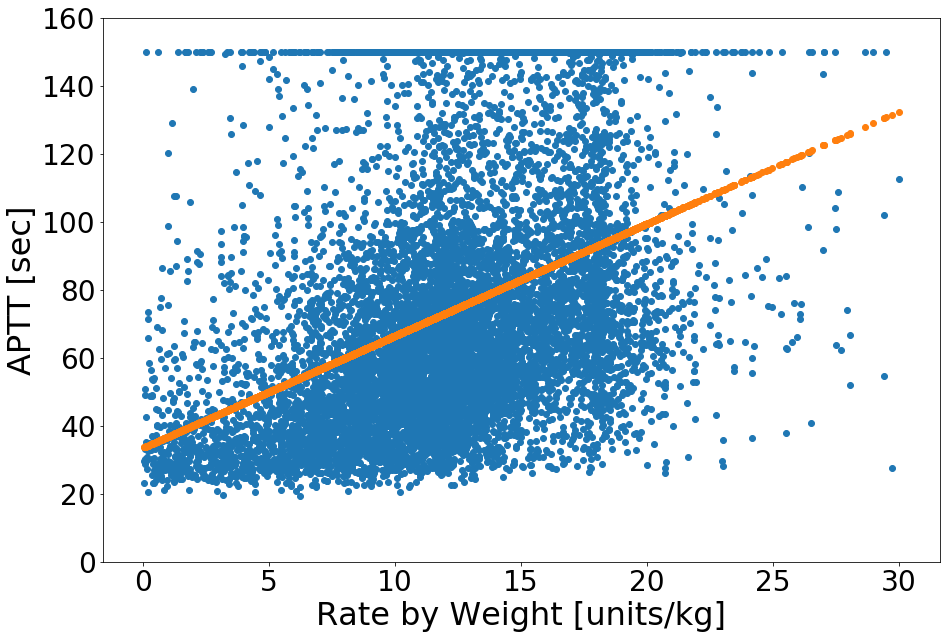

In [61]:
# Load Data
query = """
        SELECT *
        FROM `bachelorarbeit-heparin.mimic_data.cohort1_final`
        """
df = gbq.read_gbq(query, project_id = "bachelorarbeit-heparin")

# Define x & y:
x = pd.DataFrame({'kum_hep_t': df['kum_hep_t']})                 
y = pd.DataFrame({'PTT': df['PTT']})

# Determine Average Performance (n=100)
r2_scores = []

for i in range(100):
    
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=i)
    lin_reg = LinearRegression()
    lin_reg.fit(x_train, y_train)
    r2_scores.append(r2_score(y_test, lin_reg.predict(x_test)))

# Evaluate the Model
print("AVG R2-Score: ", round(mean(r2_scores),4))


# EXAMPLE

                  
# Split Data into Train-/Test-Set:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)

# Train the Linear Regression Model:
lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)

# Plot the Results:
plt.figure(figsize=(15,10))
plt.xlabel('Rate by Weight [units/kg]', fontsize=32)
plt.ylabel('APTT [sec]', fontsize=32)
plt.ylim(0,160)
plt.xticks(fontsize=28)
plt.yticks(fontsize=28)
plt.scatter(x_train, y_train)
plt.scatter(x_train, lin_reg.predict(x_train))

# Evaluate the Example:
print("EXAMPLE R2-Score: ", round(r2_score(y_test, lin_reg.predict(x_test)), 4))

### AGE

In [63]:
# Load Data
query = """
        SELECT *
        FROM `bachelorarbeit-heparin.mimic_data.cohort1_final`
        """
df = gbq.read_gbq(query, project_id = "bachelorarbeit-heparin")

# Define x & y:
x = pd.DataFrame({'kum_hep_t':      df['kum_hep_t'],
                  'age':            df['age']})              
y = pd.DataFrame({'PTT': df['PTT']})
                  
# Determine Average Performance (n=100)
r2_scores = []

for i in range(100):
    
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=i)
    lin_reg = LinearRegression()
    lin_reg.fit(x_train, y_train)
    r2_scores.append(r2_score(y_test, lin_reg.predict(x_test)))

# Evaluate the Model
print("AVG R2-Score: ", round(mean(r2_scores),4))


Downloading: 100%|███████████████████████████████████████████████████████████| 15376/15376 [00:05<00:00, 2727.96rows/s]


AVG R2-Score:  0.1877


### GENDER

In [64]:
# Load Data
query = """
        SELECT *
        FROM `bachelorarbeit-heparin.mimic_data.cohort1_final`
        """
df = gbq.read_gbq(query, project_id = "bachelorarbeit-heparin")


# Convert gender to binary variables:
for i in range(len(df['gender'])):
    
    if df['gender'][i] == 'M':
        df['gender'][i] = 0
    elif df['gender'][i] == 'F':
        df['gender'][i] = 1

# Define x & y:
x = pd.DataFrame({'kum_hep_t':      df['kum_hep_t'],
                  'gender':         df['gender']})              
y = pd.DataFrame({'PTT': df['PTT']})
                  
# Determine Average Performance (n=100)
r2_scores = []

for i in range(100):
    
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=i)
    lin_reg = LinearRegression()
    lin_reg.fit(x_train, y_train)
    r2_scores.append(r2_score(y_test, lin_reg.predict(x_test)))

# Evaluate the Model
print("AVG R2-Score: ", round(mean(r2_scores),4))


Downloading: 100%|███████████████████████████████████████████████████████████| 15376/15376 [00:05<00:00, 3073.93rows/s]


AVG R2-Score:  0.1821


### ETHNICITY

In [76]:
# Load Data
query = """
        SELECT *
        FROM `bachelorarbeit-heparin.mimic_data.cohort1_final`
        """
df = gbq.read_gbq(query, project_id = "bachelorarbeit-heparin")

# Convert Ethnicities to numeric values:
for i in range(len(df['ethnicity'])):
    if df['ethnicity'][i] == 'WHITE':
        df['ethnicity'][i] = 0
    elif df['ethnicity'][i] == 'BLACK/AFRICAN AMERICAN':
        df['ethnicity'][i] = 1
    elif df['ethnicity'][i] == 'HISPANIC/LATINO':
        df['ethnicity'][i] = 2
    elif df['ethnicity'][i] == 'ASIAN':
        df['ethnicity'][i] = 3
    else: # Miscellaneous
        df['ethnicity'][i] = 4

# Define x & y:
x = pd.DataFrame({'kum_hep_t':      df['kum_hep_t'],
                  'ethnicity':       df['ethnicity']})              
y = pd.DataFrame({'PTT': df['PTT']})
                  
# Determine Average Performance (n=100)
r2_scores = []

for i in range(100):
    
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=i)
    lin_reg = LinearRegression()
    lin_reg.fit(x_train, y_train)
    r2_scores.append(r2_score(y_test, lin_reg.predict(x_test)))

# Evaluate the Model
print("AVG R2-Score: ", round(mean(r2_scores),4))


Downloading: 100%|███████████████████████████████████████████████████████████| 15376/15376 [00:05<00:00, 2652.97rows/s]


AVG R2-Score:  0.1756


### SOFA-SCORE (GENERIC) 

In [65]:
# Load Data
query = """
        SELECT *
        FROM `bachelorarbeit-heparin.mimic_data.cohort1_final`
        """
df = gbq.read_gbq(query, project_id = "bachelorarbeit-heparin")

# Define x & y:
x = pd.DataFrame({'kum_hep_t':      df['kum_hep_t'],
                  'sofa_score':     df['sofa_score']})              
y = pd.DataFrame({'PTT': df['PTT']})
                  
# Determine Average Performance (n=100)
r2_scores = []

for i in range(100):
    
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=i)
    lin_reg = LinearRegression()
    lin_reg.fit(x_train, y_train)
    r2_scores.append(r2_score(y_test, lin_reg.predict(x_test)))

# Evaluate the Model
print("AVG R2-Score: ", round(mean(r2_scores),4))


Downloading: 100%|███████████████████████████████████████████████████████████| 15376/15376 [00:05<00:00, 2974.59rows/s]


AVG R2-Score:  0.1979


### SOFA SCORE (SPECIFIC)

In [66]:
# Load Data
query = """
        SELECT *
        FROM `bachelorarbeit-heparin.mimic_data.cohort1_final`
        """
df = gbq.read_gbq(query, project_id = "bachelorarbeit-heparin")

# Define x & y:
x = pd.DataFrame({'kum_hep_t': df['kum_hep_t'],
                  'sofa_resp':      df['sofa_resp'],
                  'sofa_coag':      df['sofa_coag'],
                  'sofa_liver':     df['sofa_liver'],
                  'sofa_cardio':    df['sofa_cardio'],
                  'sofa_cns':       df['sofa_cns'],
                  'sofa_renal':     df['sofa_renal']})                 
y = pd.DataFrame({'PTT':            df['PTT']})
                  
# Determine Average Performance (n=100)
r2_scores = []

for i in range(100):
    
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=i)
    lin_reg = LinearRegression()
    lin_reg.fit(x_train, y_train)
    r2_scores.append(r2_score(y_test, lin_reg.predict(x_test)))

# Evaluate the Model
print("AVG R2-Score: ", round(mean(r2_scores),4))


Downloading: 100%|███████████████████████████████████████████████████████████| 15376/15376 [00:04<00:00, 3370.36rows/s]


AVG R2-Score:  0.204


### ICU-Type

In [67]:
# Load Data
query = """
        SELECT *
        FROM `bachelorarbeit-heparin.mimic_data.cohort1_final`
        """
df = gbq.read_gbq(query, project_id = "bachelorarbeit-heparin")


# Convert ICU_Types to numeric values:
for i in range(len(df['ICU_Type'])):
    if df['ICU_Type'][i] == 'Coronary Care Unit (CCU)':
        df['ICU_Type'][i] = 0
    elif df['ICU_Type'][i] == 'Cardiac Vascular Intensive Care Unit (CVICU)':
        df['ICU_Type'][i] = 1
    elif df['ICU_Type'][i] == 'Medical Intensive Care Unit (MICU)':
        df['ICU_Type'][i] = 2
    elif df['ICU_Type'][i] == 'Surgical Intensive Care Unit (SICU)':
        df['ICU_Type'][i] = 3
    elif df['ICU_Type'][i] == 'Trauma SICU (TSICU)':
        df['ICU_Type'][i] = 4
    elif df['ICU_Type'][i] == 'Medical/Surgical Intensive Care Unit (MICU/SICU)':
        df['ICU_Type'][i] = 5
    elif df['ICU_Type'][i] == 'Neuro Intermediate':
        df['ICU_Type'][i] = 6
    elif df['ICU_Type'][i] == 'Neuro Surgical Intensive Care Unit (Neuro SICU)':
        df['ICU_Type'][i] = 7
    elif df['ICU_Type'][i] == 'Neuro Stepdown':
        df['ICU_Type'][i] = 8
    else: # Miscellaneous
        df['ICU_Type'][i] = 9

# Define x & y:
x = pd.DataFrame({'kum_hep_t':      df['kum_hep_t'],
                  'ICU_Type':       df['ICU_Type']})              
y = pd.DataFrame({'PTT': df['PTT']})
                  
# Determine Average Performance (n=100)
r2_scores = []

for i in range(100):
    
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=i)
    lin_reg = LinearRegression()
    lin_reg.fit(x_train, y_train)
    r2_scores.append(r2_score(y_test, lin_reg.predict(x_test)))

# Evaluate the Model
print("AVG R2-Score: ", round(mean(r2_scores),4))


Downloading: 100%|███████████████████████████████████████████████████████████| 15376/15376 [00:04<00:00, 3251.00rows/s]


AVG R2-Score:  0.179


### RELATIVE CHARTTIME

In [68]:
# Load Data
query = """
        SELECT *
        FROM `bachelorarbeit-heparin.mimic_data.cohort1_final`
        """
df = gbq.read_gbq(query, project_id = "bachelorarbeit-heparin")

# Define x & y:
x = pd.DataFrame({'kum_hep_t':      df['kum_hep_t'],
                  'rel_charttime':  df['rel_charttime']})              
y = pd.DataFrame({'PTT': df['PTT']})
                  
# Determine Average Performance (n=100)
r2_scores = []

for i in range(100):
    
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=i)
    lin_reg = LinearRegression()
    lin_reg.fit(x_train, y_train)
    r2_scores.append(r2_score(y_test, lin_reg.predict(x_test)))

# Evaluate the Model
print("AVG R2-Score: ", round(mean(r2_scores),4))


Downloading: 100%|███████████████████████████████████████████████████████████| 15376/15376 [00:04<00:00, 3150.96rows/s]


AVG R2-Score:  0.181


### ALL FEATURES

In [78]:
# Load Data
query = """
        SELECT *
        FROM `bachelorarbeit-heparin.mimic_data.cohort1_final`
        """
df = gbq.read_gbq(query, project_id = "bachelorarbeit-heparin")


# Convert gender to binary variables:
for i in range(len(df['gender'])):
    
    if df['gender'][i] == 'M':
        df['gender'][i] = 0
    elif df['gender'][i] == 'F':
        df['gender'][i] = 1

# Convert ICU_Types to numeric values:
for i in range(len(df['ICU_Type'])):
    if df['ICU_Type'][i] == 'Coronary Care Unit (CCU)':
        df['ICU_Type'][i] = 0
    elif df['ICU_Type'][i] == 'Cardiac Vascular Intensive Care Unit (CVICU)':
        df['ICU_Type'][i] = 1
    elif df['ICU_Type'][i] == 'Medical Intensive Care Unit (MICU)':
        df['ICU_Type'][i] = 2
    elif df['ICU_Type'][i] == 'Surgical Intensive Care Unit (SICU)':
        df['ICU_Type'][i] = 3
    elif df['ICU_Type'][i] == 'Trauma SICU (TSICU)':
        df['ICU_Type'][i] = 4
    elif df['ICU_Type'][i] == 'Medical/Surgical Intensive Care Unit (MICU/SICU)':
        df['ICU_Type'][i] = 5
    elif df['ICU_Type'][i] == 'Neuro Intermediate':
        df['ICU_Type'][i] = 6
    elif df['ICU_Type'][i] == 'Neuro Surgical Intensive Care Unit (Neuro SICU)':
        df['ICU_Type'][i] = 7
    elif df['ICU_Type'][i] == 'Neuro Stepdown':
        df['ICU_Type'][i] = 8
    else: # Miscellaneous
        df['ICU_Type'][i] = 9
        
# Convert Ethnicities to numeric values:
for i in range(len(df['ethnicity'])):
    if df['ethnicity'][i] == 'WHITE':
        df['ethnicity'][i] = 0
    elif df['ethnicity'][i] == 'BLACK/AFRICAN AMERICAN':
        df['ethnicity'][i] = 1
    elif df['ethnicity'][i] == 'HISPANIC/LATINO':
        df['ethnicity'][i] = 2
    elif df['ethnicity'][i] == 'ASIAN':
        df['ethnicity'][i] = 3
    else: # Miscellaneous
        df['ethnicity'][i] = 4
        
# Define x & y:
x = pd.DataFrame({'kum_hep_t': df['kum_hep_t'],
                  'sofa_resp':      df['sofa_resp'],
                  'sofa_coag':      df['sofa_coag'],
                  'sofa_liver':     df['sofa_liver'],
                  'sofa_cardio':    df['sofa_cardio'],
                  'sofa_cns':       df['sofa_cns'],
                  'sofa_renal':     df['sofa_renal'],
                  'age':            df['age'],
                  'rel_charttime':  df['rel_charttime'],
                  'ethnicity':      df['ethnicity'],
                  'gender':         df['gender'],
                  'ICU_Type':       df['ICU_Type']})                 
y = pd.DataFrame({'PTT':            df['PTT']})
                  
# Determine Average Performance (n=100)
r2_scores = []

for i in range(100):
    
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=i)
    lin_reg = LinearRegression()
    lin_reg.fit(x_train, y_train)
    r2_scores.append(r2_score(y_test, lin_reg.predict(x_test)))

# Evaluate the Model
print("AVG R2-Score: ", round(mean(r2_scores),4))


Downloading: 100%|███████████████████████████████████████████████████████████| 15376/15376 [00:04<00:00, 3169.13rows/s]


AVG R2-Score:  0.2324


### Some Interesting Plots 

### AGE


Downloading: 100%|███████████████████████████████████████████████████████████| 15376/15376 [00:04<00:00, 3192.69rows/s]


AVG R2-Score:  0.0147
EXAMPLE R2-Score:  0.0131


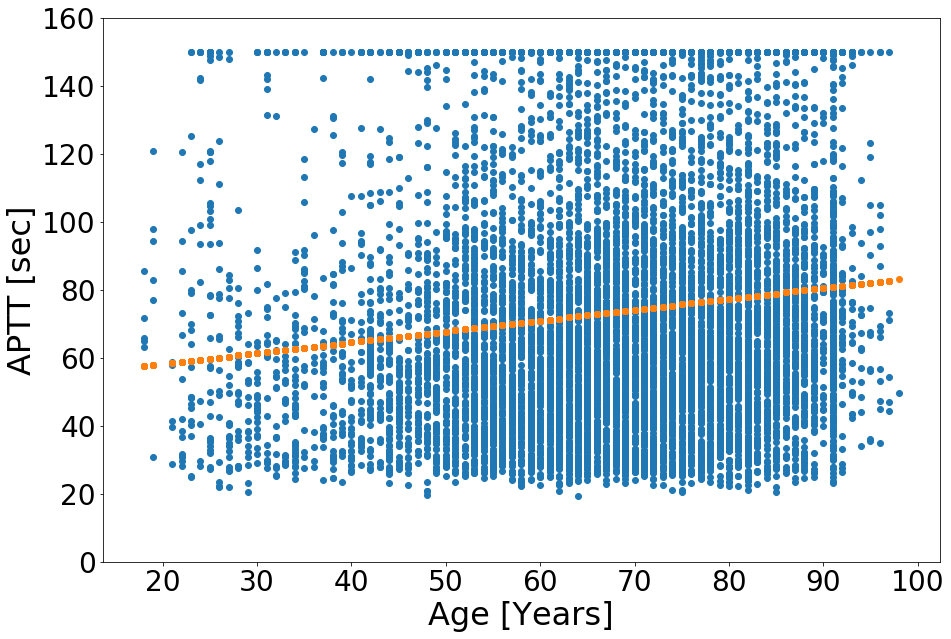

In [73]:
# Load Data
query = """
        SELECT *
        FROM `bachelorarbeit-heparin.mimic_data.cohort1_final`
        """
df = gbq.read_gbq(query, project_id = "bachelorarbeit-heparin")

# Define x & y:
x = pd.DataFrame({'age': df['age']})              
y = pd.DataFrame({'PTT': df['PTT']})

# Determine Average Performance (n=100)
r2_scores = []

for i in range(100):
    
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=i)
    lin_reg = LinearRegression()
    lin_reg.fit(x_train, y_train)
    r2_scores.append(r2_score(y_test, lin_reg.predict(x_test)))

# Evaluate the Model
print("AVG R2-Score: ", round(mean(r2_scores),4))


# EXAMPLE

                  
# Split Data into Train-/Test-Set:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)

# Train the Linear Regression Model:
lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)

# Plot the Results:
plt.figure(figsize=(15,10))
plt.xlabel('Age [Years]', fontsize=32)
plt.ylabel('APTT [sec]', fontsize=32)
plt.ylim(0,160)
plt.xticks(fontsize=28)
plt.yticks(fontsize=28)
plt.scatter(x_train, y_train)
plt.scatter(x_train, lin_reg.predict(x_train))

# Evaluate the model:
print("EXAMPLE R2-Score: ", round(r2_score(y_test, lin_reg.predict(x_test)), 4))

### SOFA-SCORE (GENERIC)


Downloading: 100%|███████████████████████████████████████████████████████████| 15376/15376 [00:05<00:00, 2620.44rows/s]


AVG R2-Score:  0.0031
EXAMPLE R2-Score:  0.0021


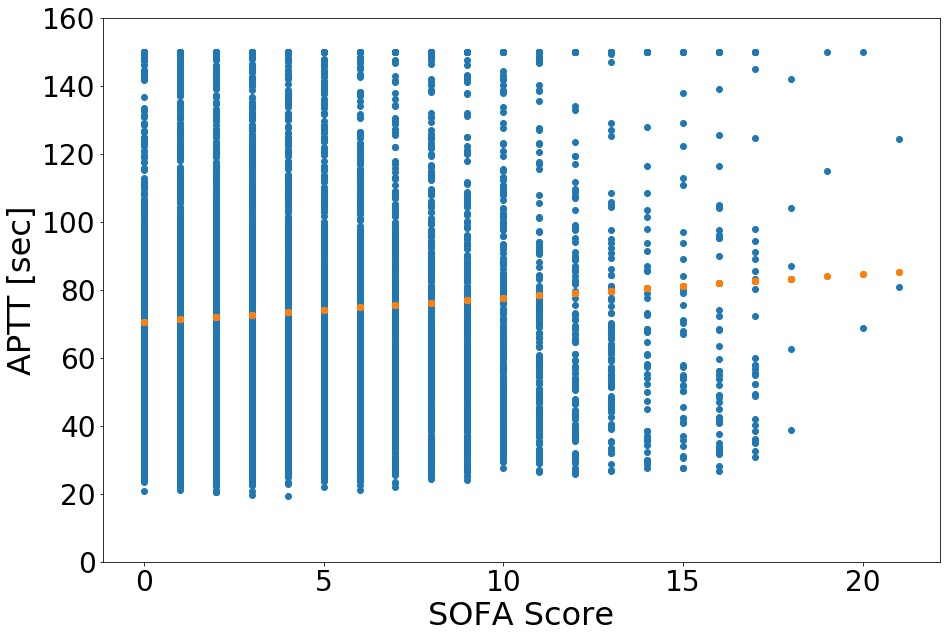

In [74]:
# Load Data
query = """
        SELECT *
        FROM `bachelorarbeit-heparin.mimic_data.cohort1_final`
        """
df = gbq.read_gbq(query, project_id = "bachelorarbeit-heparin")

# Define x & y:
x = pd.DataFrame({'sofa_score': df['sofa_score']})              
y = pd.DataFrame({'PTT': df['PTT']})
                  
# Determine Average Performance (n=100)
r2_scores = []

for i in range(100):
    
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=i)
    lin_reg = LinearRegression()
    lin_reg.fit(x_train, y_train)
    r2_scores.append(r2_score(y_test, lin_reg.predict(x_test)))

# Evaluate the Model
print("AVG R2-Score: ", round(mean(r2_scores),4))


# EXAMPLE

                  
# Split Data into Train-/Test-Set:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)

# Train the Linear Regression Model:
lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)

# Plot the Results:
plt.figure(figsize=(15,10))
plt.xlabel('SOFA Score', fontsize=32)
plt.ylabel('APTT [sec]', fontsize=32)
plt.ylim(0,160)
plt.xticks(fontsize=28)
plt.yticks(fontsize=28)
plt.scatter(x_train, y_train)
plt.scatter(x_train, lin_reg.predict(x_train))

# Evaluate the model:
print("EXAMPLE R2-Score: ", round(r2_score(y_test, lin_reg.predict(x_test)), 4))

### RELATIVE CHARTTIME


Downloading: 100%|███████████████████████████████████████████████████████████| 15376/15376 [00:04<00:00, 3145.72rows/s]


AVG R2-Score:  0.0166
EXAMPLE R2-Score:  0.0129


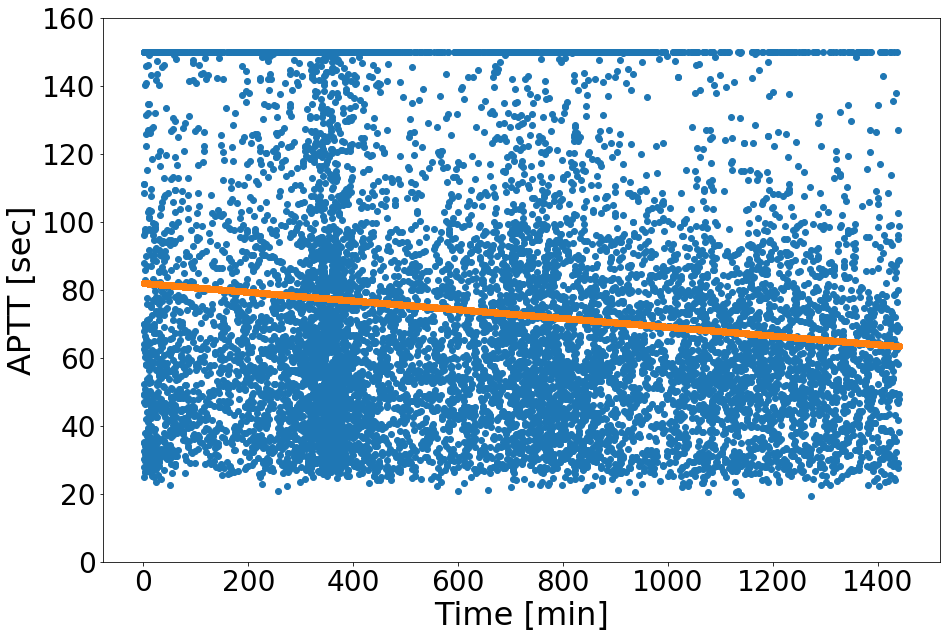

In [75]:
# Load Data
query = """
        SELECT *
        FROM `bachelorarbeit-heparin.mimic_data.cohort1_final`
        """
df = gbq.read_gbq(query, project_id = "bachelorarbeit-heparin")

# Define x & y:
x = pd.DataFrame({'rel_charttime': df['rel_charttime']})              
y = pd.DataFrame({'PTT': df['PTT']})
                  
# Determine Average Performance (n=100)
r2_scores = []

for i in range(100):
    
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=i)
    lin_reg = LinearRegression()
    lin_reg.fit(x_train, y_train)
    r2_scores.append(r2_score(y_test, lin_reg.predict(x_test)))

# Evaluate the Model
print("AVG R2-Score: ", round(mean(r2_scores),4))


# EXAMPLE

                  
# Split Data into Train-/Test-Set:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)

# Train the Linear Regression Model:
lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)

# Plot the Results:
plt.figure(figsize=(15,10))
plt.xlabel('Time [min]', fontsize=32)
plt.ylabel('APTT [sec]', fontsize=32)
plt.ylim(0,160)
plt.xticks(fontsize=28)
plt.yticks(fontsize=28)
plt.scatter(x_train, y_train)
plt.scatter(x_train, lin_reg.predict(x_train))

# Evaluate the model:
print("EXAMPLE R2-Score: ", round(r2_score(y_test, lin_reg.predict(x_test)), 4))